<a href="https://colab.research.google.com/github/ridvanyigit/Tensorflow-2.0/blob/main/IMDB_Review_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  IMDB Review Classification using RNN - LSTM

### Import Necessary Libraries



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers  # For regularization

In [70]:
tf.__version__

'2.18.0'

### Data Loading and Preprocessing

In [71]:
imdb.load_data(num_words=20000)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 194, 1153, 194

Load the dataset (with word count limitation)

In [72]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)

In [73]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

Pad sequences to the same length

In [74]:
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [75]:
X_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

In [76]:
X_train.shape, X_test.shape

((25000, 100), (25000, 100))

### Model Building (with Overfitting Reduction Techniques)

Build LSTM Network

In [77]:
vocab_size = 20000
embed_size = 128

model = Sequential()

# Add layers
model.add(Input(shape=(X_train.shape[1],)))  # Input layer

# Embedding layer to learn word vectors
model.add(Embedding(vocab_size, embed_size))

# Dropout added to reduce overfitting (increased rate)
model.add(Dropout(0.6))

# LSTM layer (fewer neurons, regularization)
model.add(LSTM(units=32,
               activation='tanh',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) # L1/L2 regularization
model.add(Dropout(0.6))  # Dropout increased

# Output layer (single neuron, sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model (smaller learning rate)
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,580,641 (9.84 MB)

 Trainable params: 2,580,641 (9.84 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training (with Early Stopping)

Define EarlyStopping callback

In [78]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Metric to monitor: validation loss
    patience=5,                 # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True    # Restore model weights from the epoch with the best value of the monitored metric
)

Train the model

In [79]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,                   # More epochs (controlled by early stopping)
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]       # Add early stopping callback
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5215 - loss: 1.9047 - val_accuracy: 0.6568 - val_loss: 1.4551
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6541 - loss: 1.3071 - val_accuracy: 0.7920 - val_loss: 0.8741
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8103 - loss: 0.7761 - val_accuracy: 0.8222 - val_loss: 0.5826
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8625 - loss: 0.5112 - val_accuracy: 0.8408 - val_loss: 0.4766
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8835 - loss: 0.4045 - val_accuracy: 0.8403 - val_loss: 0.4564
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8967 - loss: 0.3626 - val_accuracy: 0.8380 - val_loss: 0.4591
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9054 - loss: 0.3266 - val_accuracy: 0.8352 - val_loss: 0.4526
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9173 - loss: 0.3014 - val_ac

In [80]:
history.history

{'accuracy': [0.5459200143814087,
  0.6981199979782104,
  0.8217599987983704,
  0.8639600276947021,
  0.8825600147247314,
  0.8949999809265137,
  0.9029600024223328,
  0.913919985294342,
  0.91948002576828,
  0.9253600239753723,
  0.9307600259780884,
  0.9361600279808044],
 'loss': [1.7480665445327759,
  1.1575933694839478,
  0.7000588774681091,
  0.4847971796989441,
  0.4012610614299774,
  0.36079132556915283,
  0.33061379194259644,
  0.30335015058517456,
  0.2858615219593048,
  0.2674785256385803,
  0.24882793426513672,
  0.23514653742313385],
 'val_accuracy': [0.6567999720573425,
  0.7920399904251099,
  0.8222399950027466,
  0.8407599925994873,
  0.8402799963951111,
  0.8379999995231628,
  0.8351600170135498,
  0.8265200257301331,
  0.8240000009536743,
  0.817799985408783,
  0.8254799842834473,
  0.8220000267028809],
 'val_loss': [1.4551315307617188,
  0.8740976452827454,
  0.5826181769371033,
  0.476637065410614,
  0.45640042424201965,
  0.45906010270118713,
  0.4525969624519348,
 

In [84]:
history.history['loss']

[1.7480665445327759,
 1.1575933694839478,
 0.7000588774681091,
 0.4847971796989441,
 0.4012610614299774,
 0.36079132556915283,
 0.33061379194259644,
 0.30335015058517456,
 0.2858615219593048,
 0.2674785256385803,
 0.24882793426513672,
 0.23514653742313385]

In [81]:
len(history.history['loss'])

12

In [82]:
epochs = len(history.history['loss'])

def plot_learningCurve(history, epochs):
  epoch_range=range(1, epochs+1)
  # plot training & validadion accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

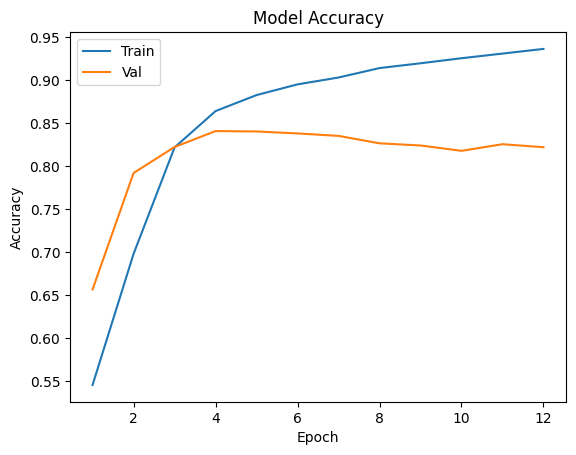

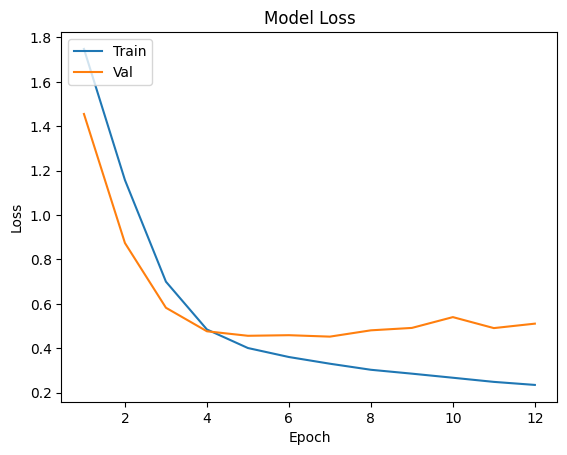

In [83]:
plot_learningCurve(history, epochs)